In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import seaborn as sns

In [299]:
def normalize(df, column_index):
    mean = df.iloc[:, column_index].mean()
    std = df.iloc[:, column_index].std()
    for i in range(len(df)):
        df.iloc[i, column_index] = (df.iloc[i, column_index] - mean)/std


In [318]:
df = pd.read_excel("./datafeatures_14.xlsx")

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  359 non-null    int64         
 1   Date                        359 non-null    datetime64[ns]
 2   Contest number              359 non-null    int64         
 3   Word                        359 non-null    object        
 4   Number of reported results  359 non-null    int64         
 5   Number in hard mode         359 non-null    int64         
 6   1 try                       359 non-null    int64         
 7   2 tries                     359 non-null    int64         
 8   3 tries                     359 non-null    int64         
 9   4 tries                     359 non-null    int64         
 10  5 tries                     359 non-null    int64         
 11  6 tries                     359 non-null    int64         

In [320]:
for i in range(16, 29):
    normalize(df, i)

In [321]:
df.mean()

C:\Users\曲荣潇\AppData\Local\Temp\ipykernel_16472\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
C:\Users\曲荣潇\AppData\Local\Temp\ipykernel_16472\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0                    1.790000e+02
Contest number                3.810000e+02
Number of reported results    9.091888e+04
Number in hard mode           5.098351e+03
1 try                         4.707521e-01
2 tries                       5.841226e+00
3 tries                       2.271588e+01
4 tries                       3.290251e+01
5 tries                       2.362396e+01
6 tries                       1.154596e+01
7 or more tries (X)           2.799443e+00
Etrial                        4.192340e+00
weekday                       3.008357e+00
HD_ratio                      7.763431e-02
double                        1.360719e-17
trible                       -8.690047e-17
double_space                  1.688529e-16
begin                        -8.999301e-17
end                           2.628662e-17
duplicate                     8.442643e-17
freq                          1.189547e-15
freq_weig                     7.765067e-15
duplicate_con                 8.442643e-17
vowel_num  

In [322]:
Etrials = list(df["Etrial"])
Etrials.sort()

In [323]:
Etrials[120]

4.01

In [ ]:
df.iloc[:, 15:28].loc[df["Etrial"] < 4.01, lasso_reg1.coef_ != 0].mean(axis=0)

trible          0.040280
double_space    0.027890
begin           0.284264
end             0.077426
duplicate      -0.268392
freq_weig       0.262437
vowel_begin    -0.112766
dtype: float64

In [ ]:
# GMM = GaussianMixture(n_components=3, \
#                         means_init=[\
#                         np.mean(df.iloc[:, 15:28].loc[df["Etrial"] < 4.01, lasso_reg1.coef_ != 0]), \
#                         np.mean(df.iloc[:, 15:28].loc[df["Etrial"] < 4.32, lasso_reg1.coef_ != 0].loc[df["Etrial"] >= 4.01, :]), \
#                         np.mean(df.iloc[:, 15:28].loc[df["Etrial"] > 4.32, lasso_reg1.coef_ != 0])])


e:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [548]:
GMM = GaussianMixture(n_components=3)

In [549]:
GMM.fit(df.iloc[:, 16:28].loc[:, lasso_reg1.coef_ != 0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [550]:
df["GMM_Components"] = GMM.predict(df.iloc[:, 16:28].loc[:, lasso_reg1.coef_ != 0])

In [486]:
# Distributions
for i in range(5):
    print(sum(df["GMM_Components"]==i))

43
39
68
54
155


In [487]:
# Expected trials in each components
for i in range(5):
    print(np.mean(df.loc[df["GMM_Components"]==i, "Etrial"]))
print(np.mean(df.loc[:, "Etrial"]))

4.047674418604651
4.443333333333334
4.12764705882353
4.207037037037038
4.19258064516129
4.192339832869077


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  359 non-null    int64         
 1   Date                        359 non-null    datetime64[ns]
 2   Contest number              359 non-null    int64         
 3   Word                        359 non-null    object        
 4   Number of reported results  359 non-null    int64         
 5   Number in hard mode         359 non-null    int64         
 6   1 try                       359 non-null    int64         
 7   2 tries                     359 non-null    int64         
 8   3 tries                     359 non-null    int64         
 9   4 tries                     359 non-null    int64         
 10  5 tries                     359 non-null    int64         
 11  6 tries                     359 non-null    int64         

In [497]:
# Mean of trials exceeded 7
for i in range(5):
    print(np.mean(np.mean(df.loc[df["GMM_Components"]==i, :].iloc[:, 11:13])))
# print(np.mean(df.loc[:, "7 or more tries (X)"]))

5.662790697674418
8.91025641025641
7.044117647058823
8.287037037037038
6.82258064516129


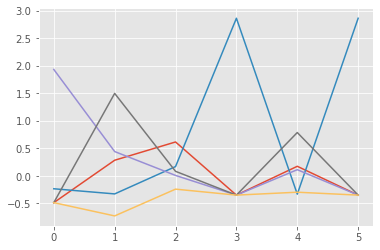

In [507]:
for i in range(5):
    plt.plot(range(sum(lasso_reg1.coef_ != 0)), GMM.means_[i])

In [557]:
df["GMM_likely"] = GMM.predict_proba(df.iloc[:, 16:28].loc[:, lasso_reg1.coef_ != 0]) @ GMM.weights_


In [555]:
# df["GMM_likely"] = np.max(GMM.predict_proba(df.iloc[:, 16:28].loc[:, lasso_reg1.coef_ != 0]), axis=1)

In [558]:
np.corrcoef(df["GMM_likely"], df["Etrial"])

array([[ 1.        , -0.22438637],
       [-0.22438637,  1.        ]])

In [348]:
X = df.iloc[:, 16:28]
y1 = df.iloc[:, 13]
y2 = df["7 or more tries (X)"] + df["6 tries"]
y1 = (y1-y1.min() + 0.1)/y1.std()
y2 = (y2-y2.min())/y2.std()
y = np.log((y1 + y2)/2)
train_X, test_X, train_y, test_y = train_test_split(X, y1, test_size=0.3)


In [349]:
lasso_reg1 = linear_model.Lasso(alpha=0.05)
lasso_reg1.fit(train_X, train_y)
lasso_reg1.score(test_X, test_y)

0.12319082761850342

In [350]:
lasso_reg1.coef_ != 0

array([False,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False])

In [351]:
p_y = lasso_reg1.predict(test_X)

<AxesSubplot:ylabel='Etrial'>

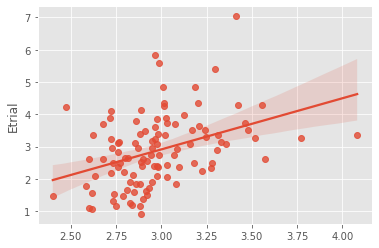

In [352]:
plt.style.use("ggplot")
sns.regplot(x=p_y, y=test_y)


In [353]:
np.corrcoef(df.iloc[:, 20], df.iloc[:, 12])

array([[1.        , 0.05667756],
       [0.05667756, 1.        ]])